In [6]:
from nilearn import datasets, plotting, image
from nilearn.input_data import NiftiLabelsMasker
from nilearn.image import load_img, resample_to_img
import pandas as pd

# from cmcrameri import cm
import matplotlib.pyplot as plt
import numpy as np


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


## functions

In [7]:
import pandas as pd

def find_indices_with_term(df, term, columns_to_check):
    """
    Find indices in a DataFrame where the given term appears in any of the specified columns.

    Parameters:
    - df: pandas.DataFrame, the DataFrame to search.
    - term: str, the term to search for.
    - columns_to_check: list, the columns in which to search for the term.

    Returns:
    - list, a list of indices where the term is found.
    """
    # Apply a mask to find the term in the specified columns, case insensitive
    mask = df[columns_to_check].apply(lambda x: x.str.contains(term, case=False, na=False)).any(axis=1)
    
    # Get the indices where the term is found
    indices_with_term = df.index[mask].tolist()
    
    return indices_with_term



# Note: Replace 'labels_df' with the actual DataFrame variable you are using.


## load atlas

In [3]:


# Load the custom atlas NIfTI file
atlas_filename = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_scaffold.nii.gz'
atlas_img = load_img(atlas_filename)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

# Resample your atlas to the same space as the target MNI template
# resampled_atlas_img = resample_to_img(source_img=atlas_img, target_img=target_img, interpolation='nearest')

# Load the CSV file containing labels
labels_csv = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin2009cAsym_labels.csv'
labels_df = pd.read_csv(labels_csv)



In [6]:
atlas_img.shape

(193, 229, 193, 542)

In [6]:
first_volume_data = atlas_img.get_fdata()[:, :, :, 0]
first_volume_data

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

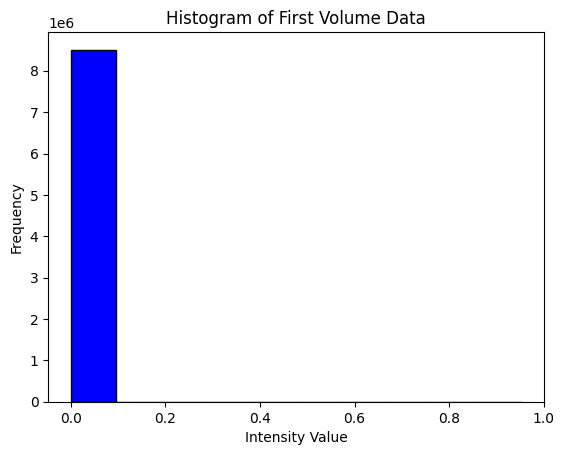

In [13]:
plt.hist(first_volume_data.flatten(), color='blue', edgecolor='black')
plt.title('Histogram of First Volume Data')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

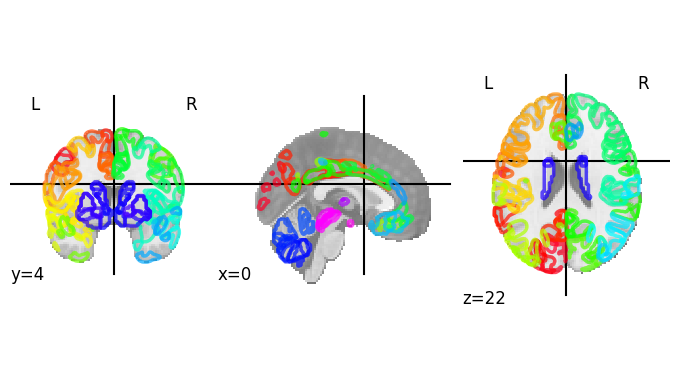

In [9]:
plotting.plot_prob_atlas(atlas_img)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


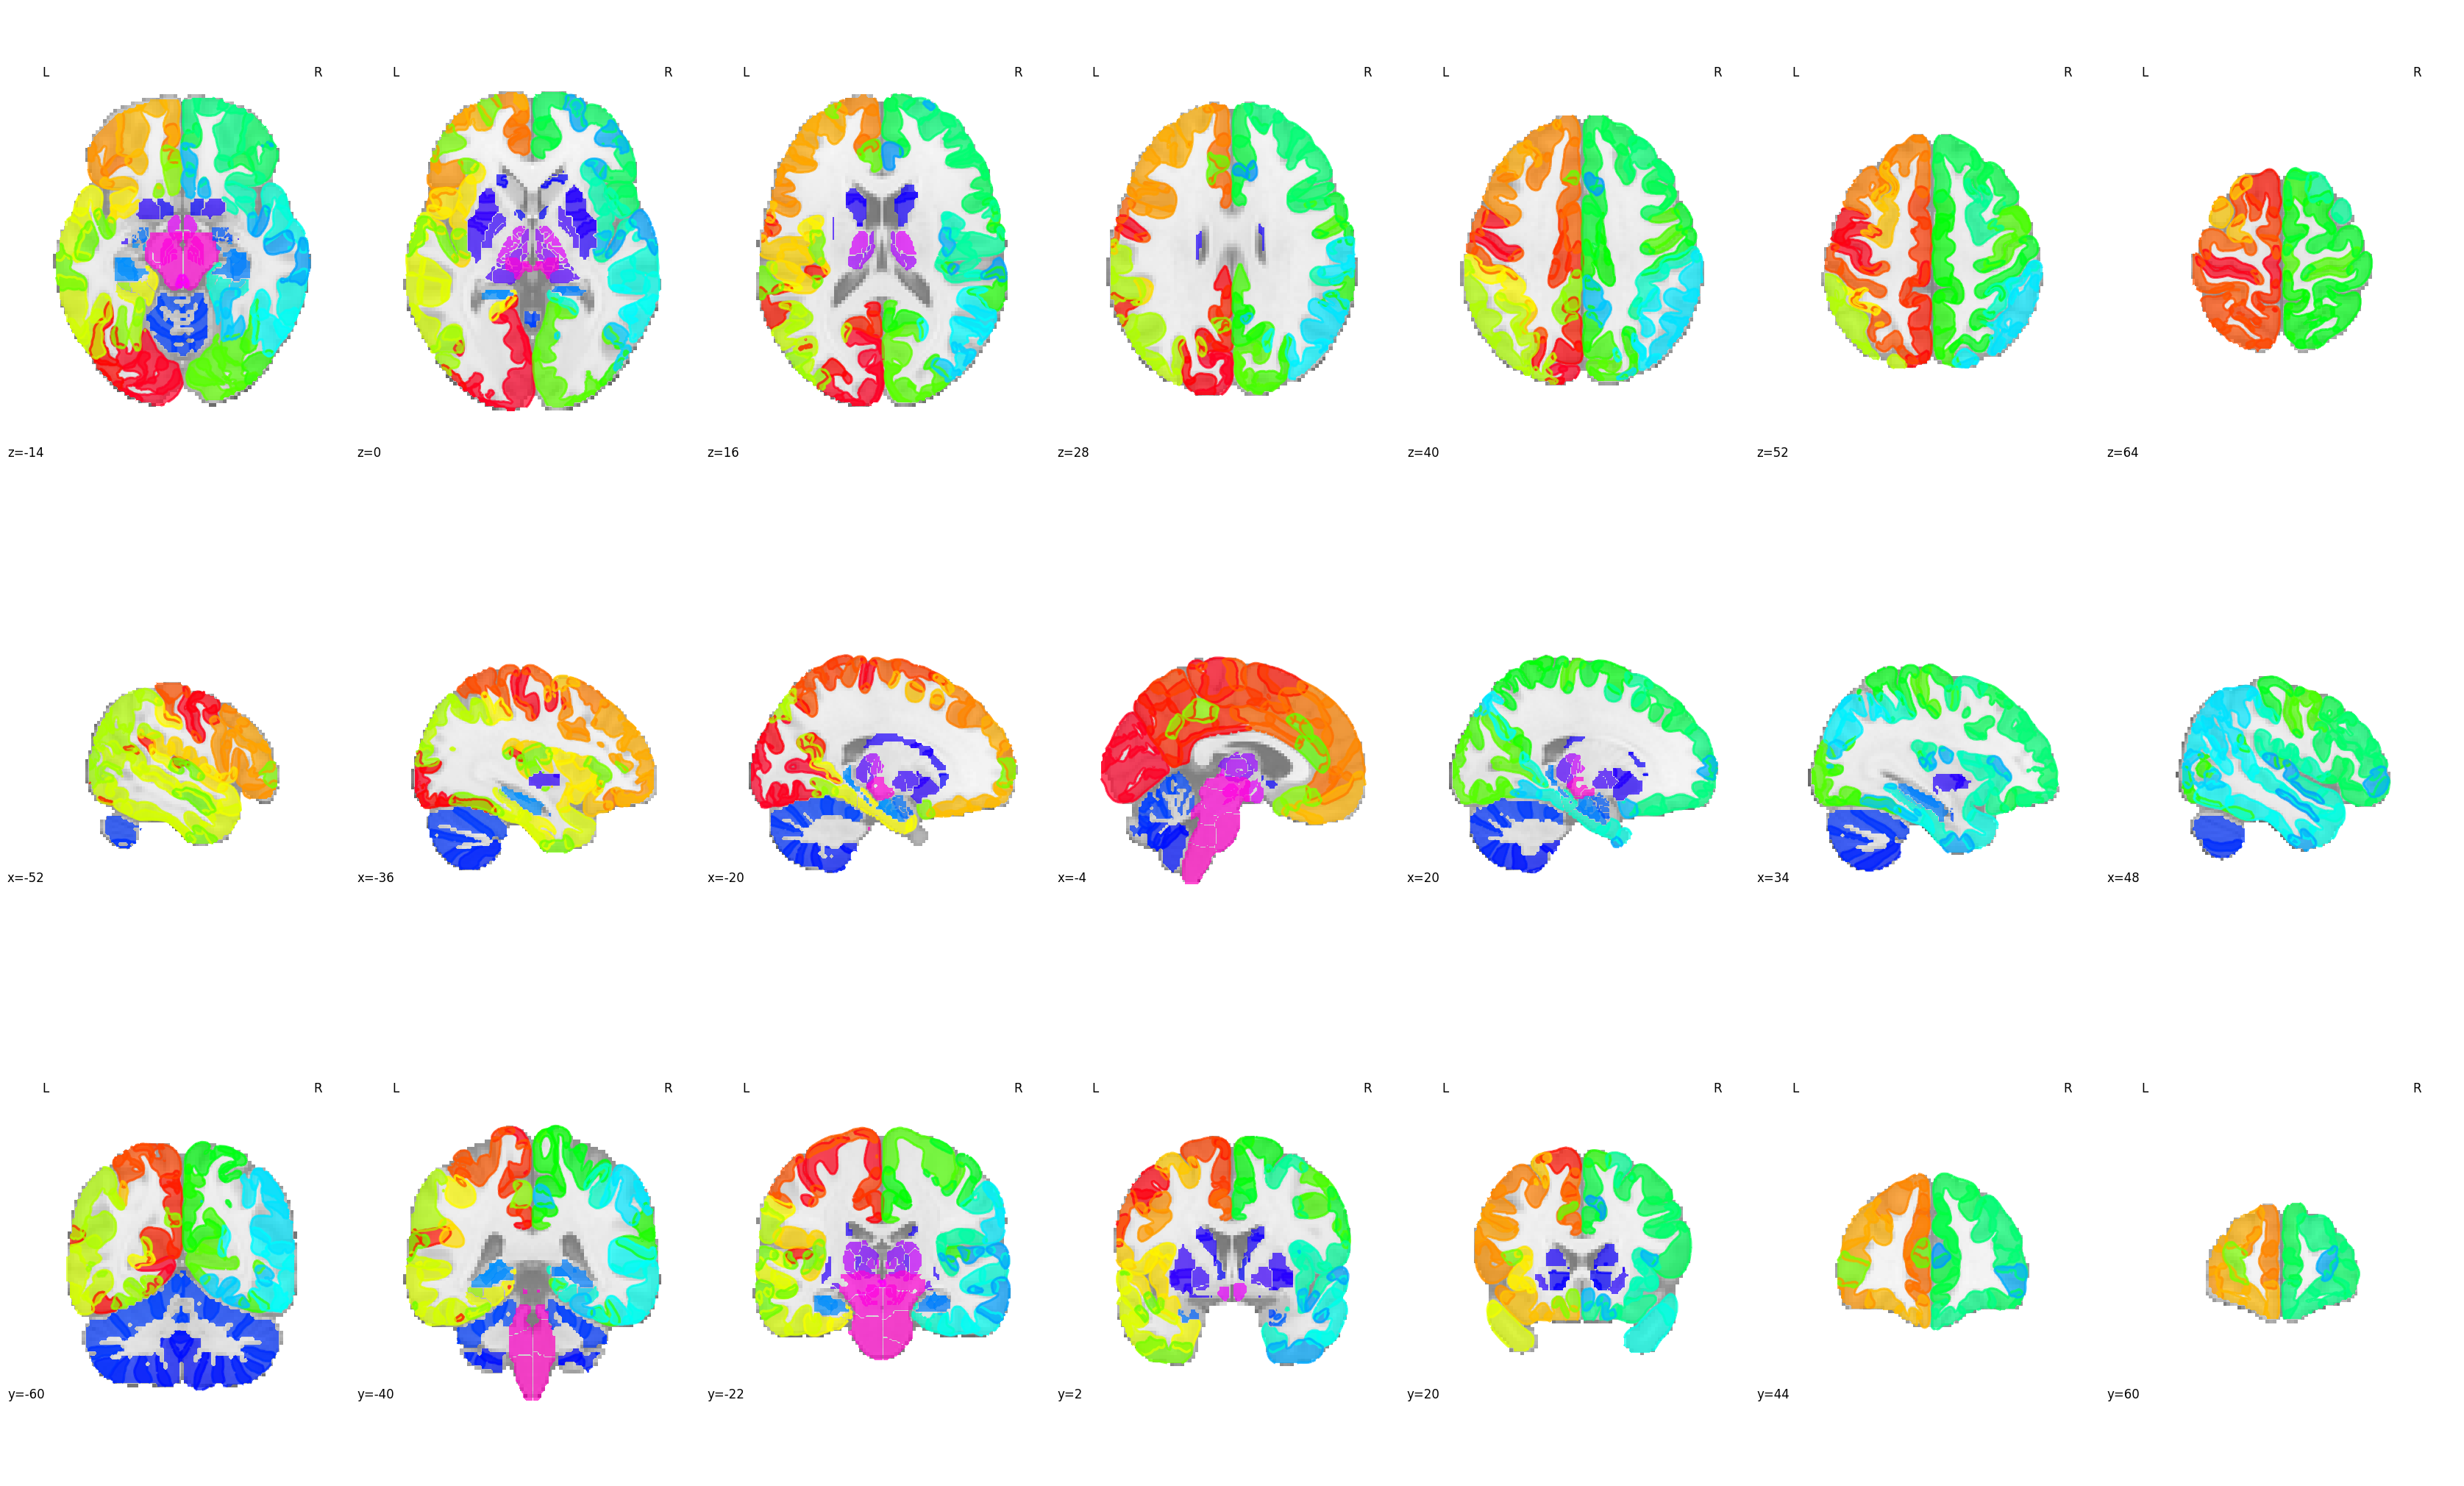

In [10]:
plotting.plot_prob_atlas(atlas_img, view_type="filled_contours", threshold=0.2, display_mode="mosaic", draw_cross=False)

In [3]:
labels_df

labels                    label_descriptions  \
0                Ctx_V1_L          Primary visual cortex (Left)   
1               Ctx_MST_L  Medial superior temporal area (Left)   
2                Ctx_V6_L              sixth visual area (Left)   
3                Ctx_V2_L             second visual area (Left)   
4                Ctx_V3_L              third visual area (Left)   
..                    ...                                   ...   
537  Bstem_BStem_Ponsrv_R            Pons right rostral ventral   
538  Bstem_BStem_Ponscv_R             Pons right caudal ventral   
539  Bstem_BStem_Ponscd_R              Pons right caudal dorsal   
540     Bstem_BStem_Med_L                          Medulla left   
541     Bstem_BStem_Med_R                         Medulla right   

          labels_2        labels_3         labels_4  \
0         Ctx_V1_L       striate_L   visual_early_L   
1        Ctx_MST_L          dMT+_L     visual_MT+_L   
2         Ctx_V6_L            V6_L  visual_dorsal_L   
3         Ctx_V2_L  extrastriate_L   visual_early_L   
4         Ctx_V3_L  extrastriate_L   visual_early_L   
..             ...             ...              ...   
537  Shen_Pons_Rrv   Shen_Pons_Rrv           Pons_R   
538  Shen_Pons_Rcv   Shen_Pons_Rcv           Pons_R   
539  Shen_Pons_Rcd   Shen_Pons_Rcd           Pons_R   
540     Shen_Med_L      Shen_Med_L        Medulla_L   
541     Shen_Med_R      Shen_Med_R        Medulla_R   

                         labels_5  
0    Glasser2016+Petre2023VolProj  
1    Glasser2016+Petre2023VolProj  
2    Glasser2016+Petre2023VolProj  
3    Glasser2016+Petre2023VolProj  
4    Glasser2016+Petre2023VolProj  
..                            ...  
537                       Shen268  
538                       Shen268  
539                       Shen268  
540                       Shen268  
541                       Shen268  

[542 rows x 6 columns]

## subset medulla


In [18]:

columns_to_check = ['labels_4']
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


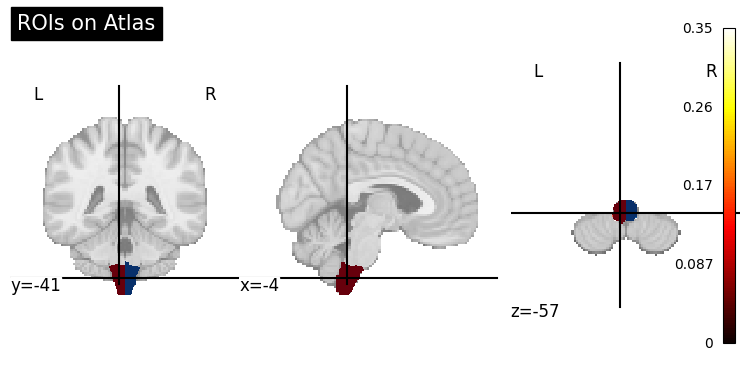

In [28]:
indices_with_medulla = find_indices_with_term(labels_df, 'medulla', columns_to_check)
display = plotting.plot_stat_map(image.index_img(atlas_img, indices_with_medulla[0]), title="ROIs on Atlas")

num_indices = len(indices_with_medulla)

# Generate a list of colormaps
# Here we use a simple approach to select from a set of colormaps
available_cmaps = ['Reds', 'Blues', 'Greens', 'Oranges', 'Purples', 'Greys', 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']
# Ensure we have enough colormaps, repeat the list if necessary
cmaps = available_cmaps * (num_indices // len(available_cmaps) + 1)

# Loop through the indices and plot each ROI with a unique colormap
for index, cmap in zip(indices_with_medulla, cmaps[:num_indices]):
    roi_img = image.index_img(atlas_img, index)
    display.add_overlay(roi_img, cmap=cmap)

# Show the plot
plotting.show()


In [ ]:
len(cm.batlow)

In [19]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)

In [21]:
insula_atlas.shape

(193, 229, 193, 26)

## insula

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


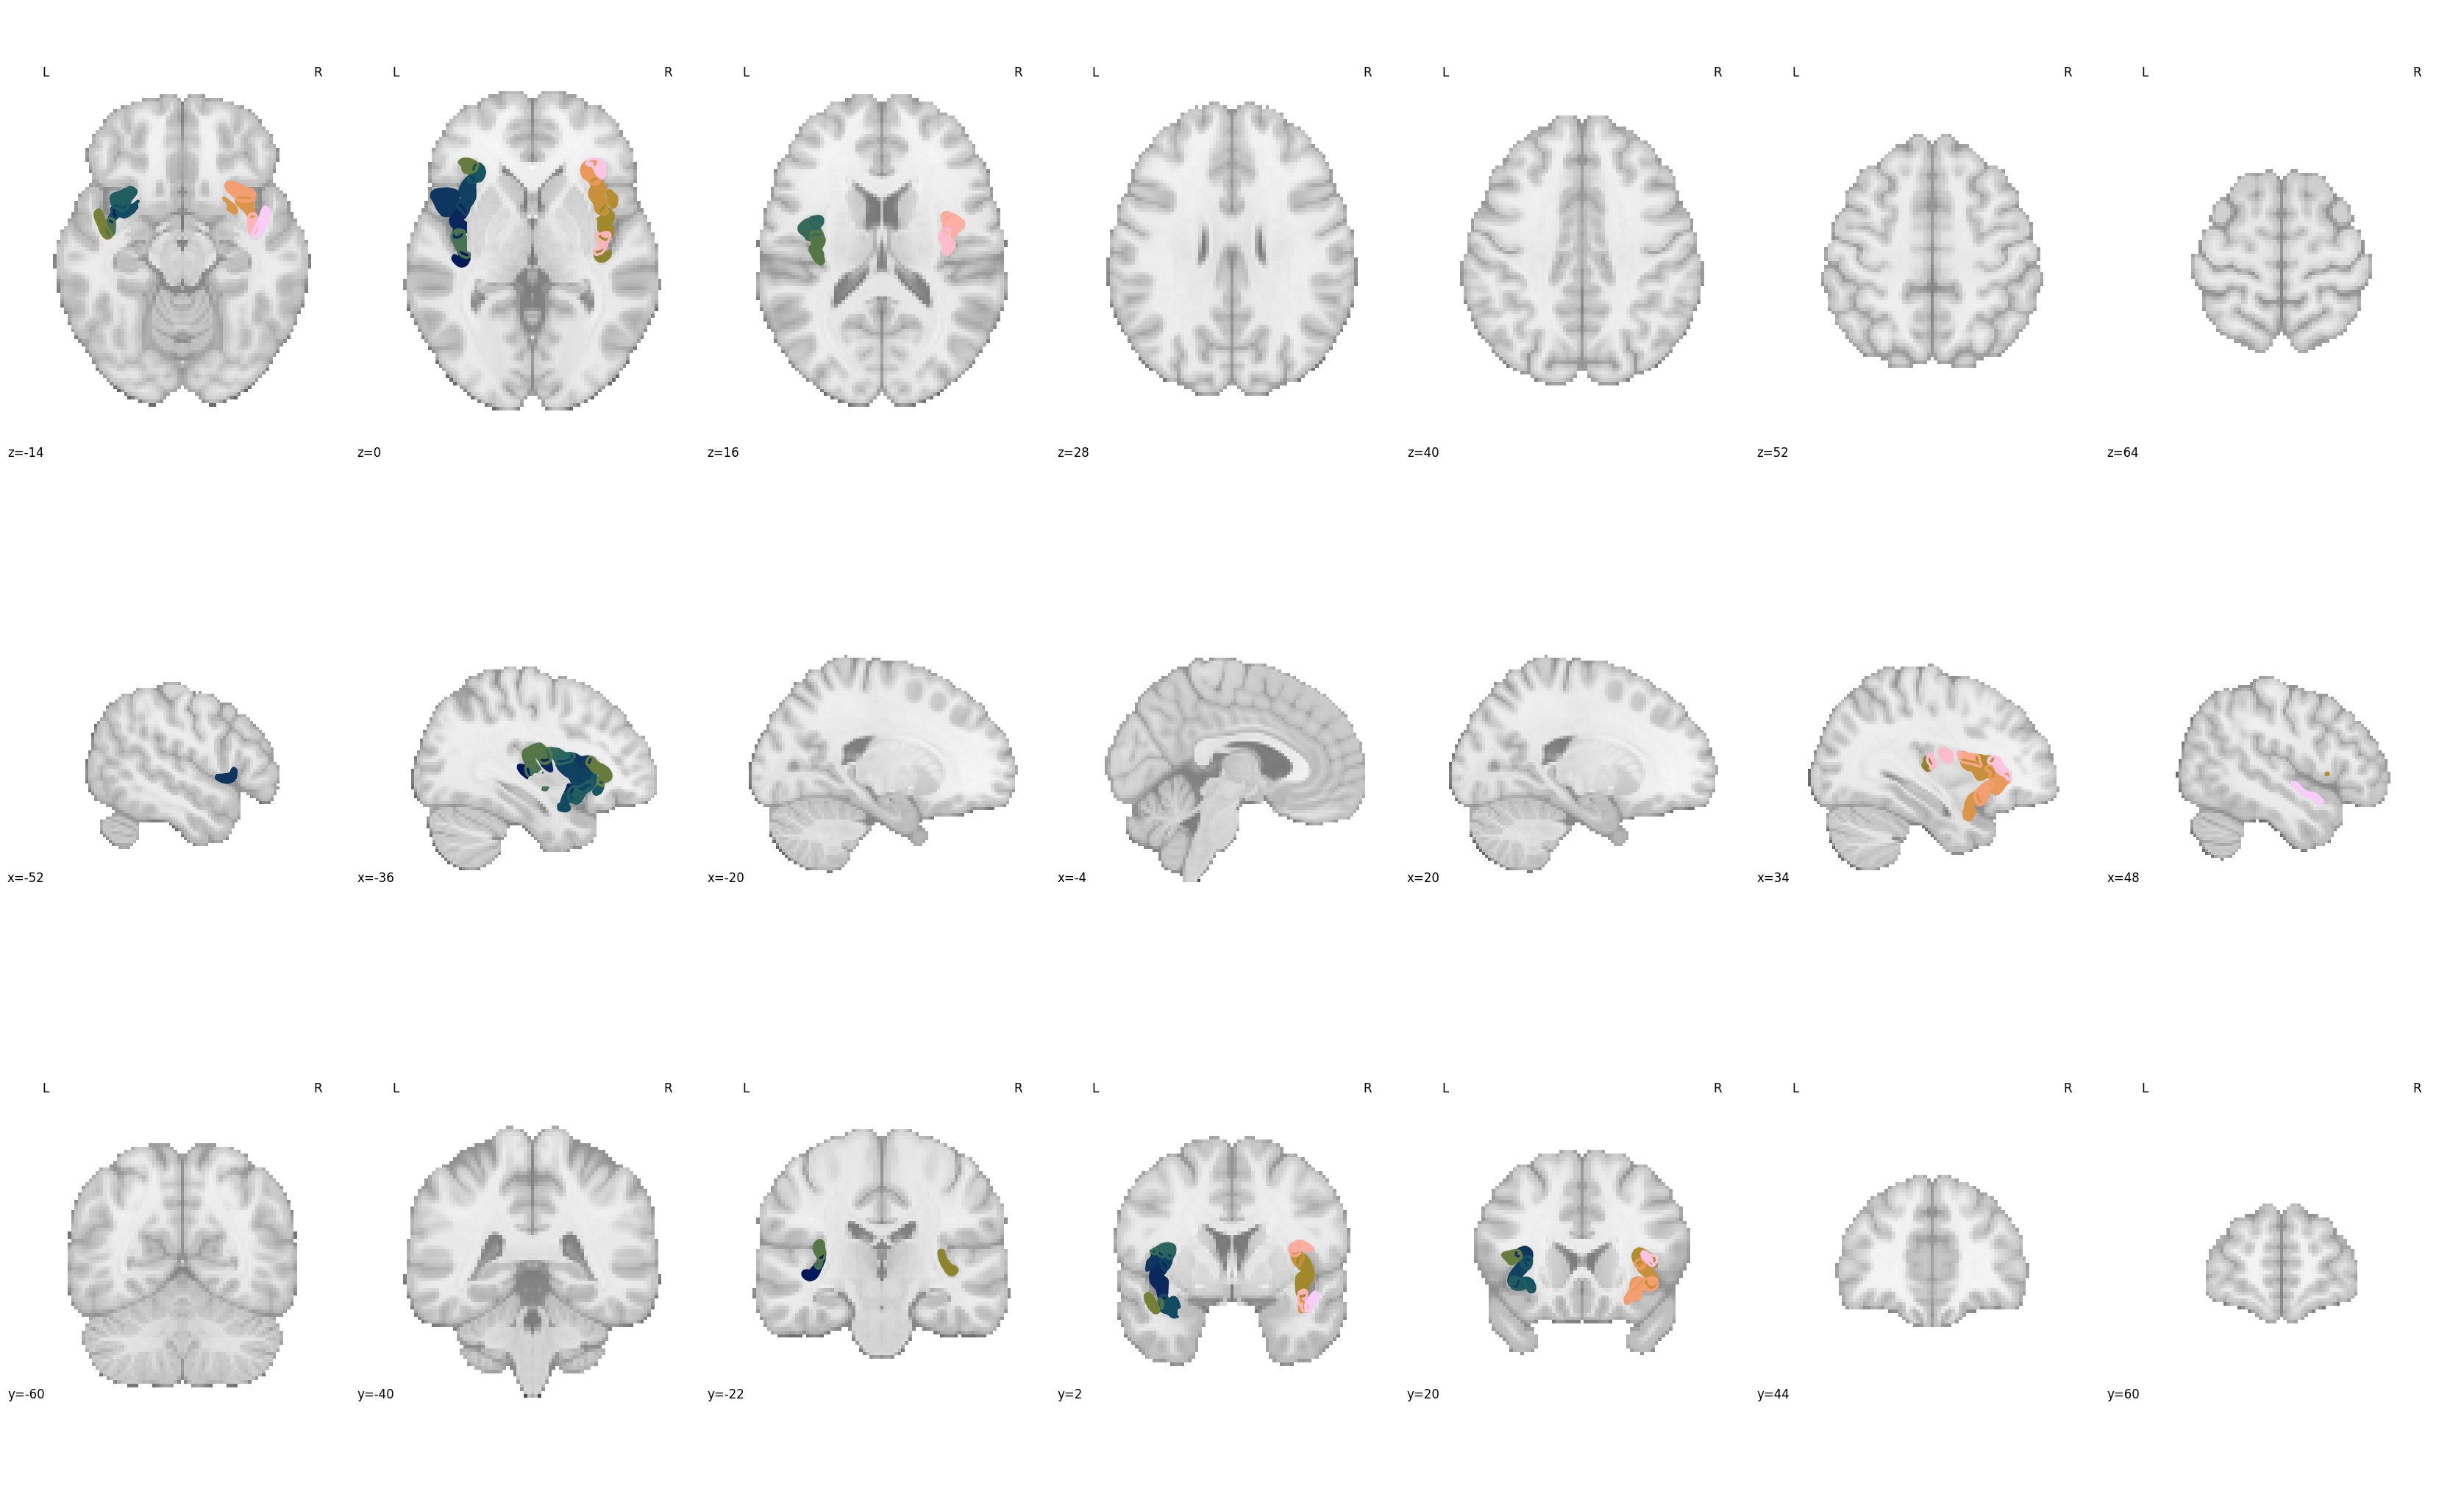

In [23]:
indices_with_insula = find_indices_with_term(labels_df, 'insula', columns_to_check)
insula_atlas = image.index_img(atlas_img, indices_with_insula)
plotting.plot_prob_atlas(insula_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


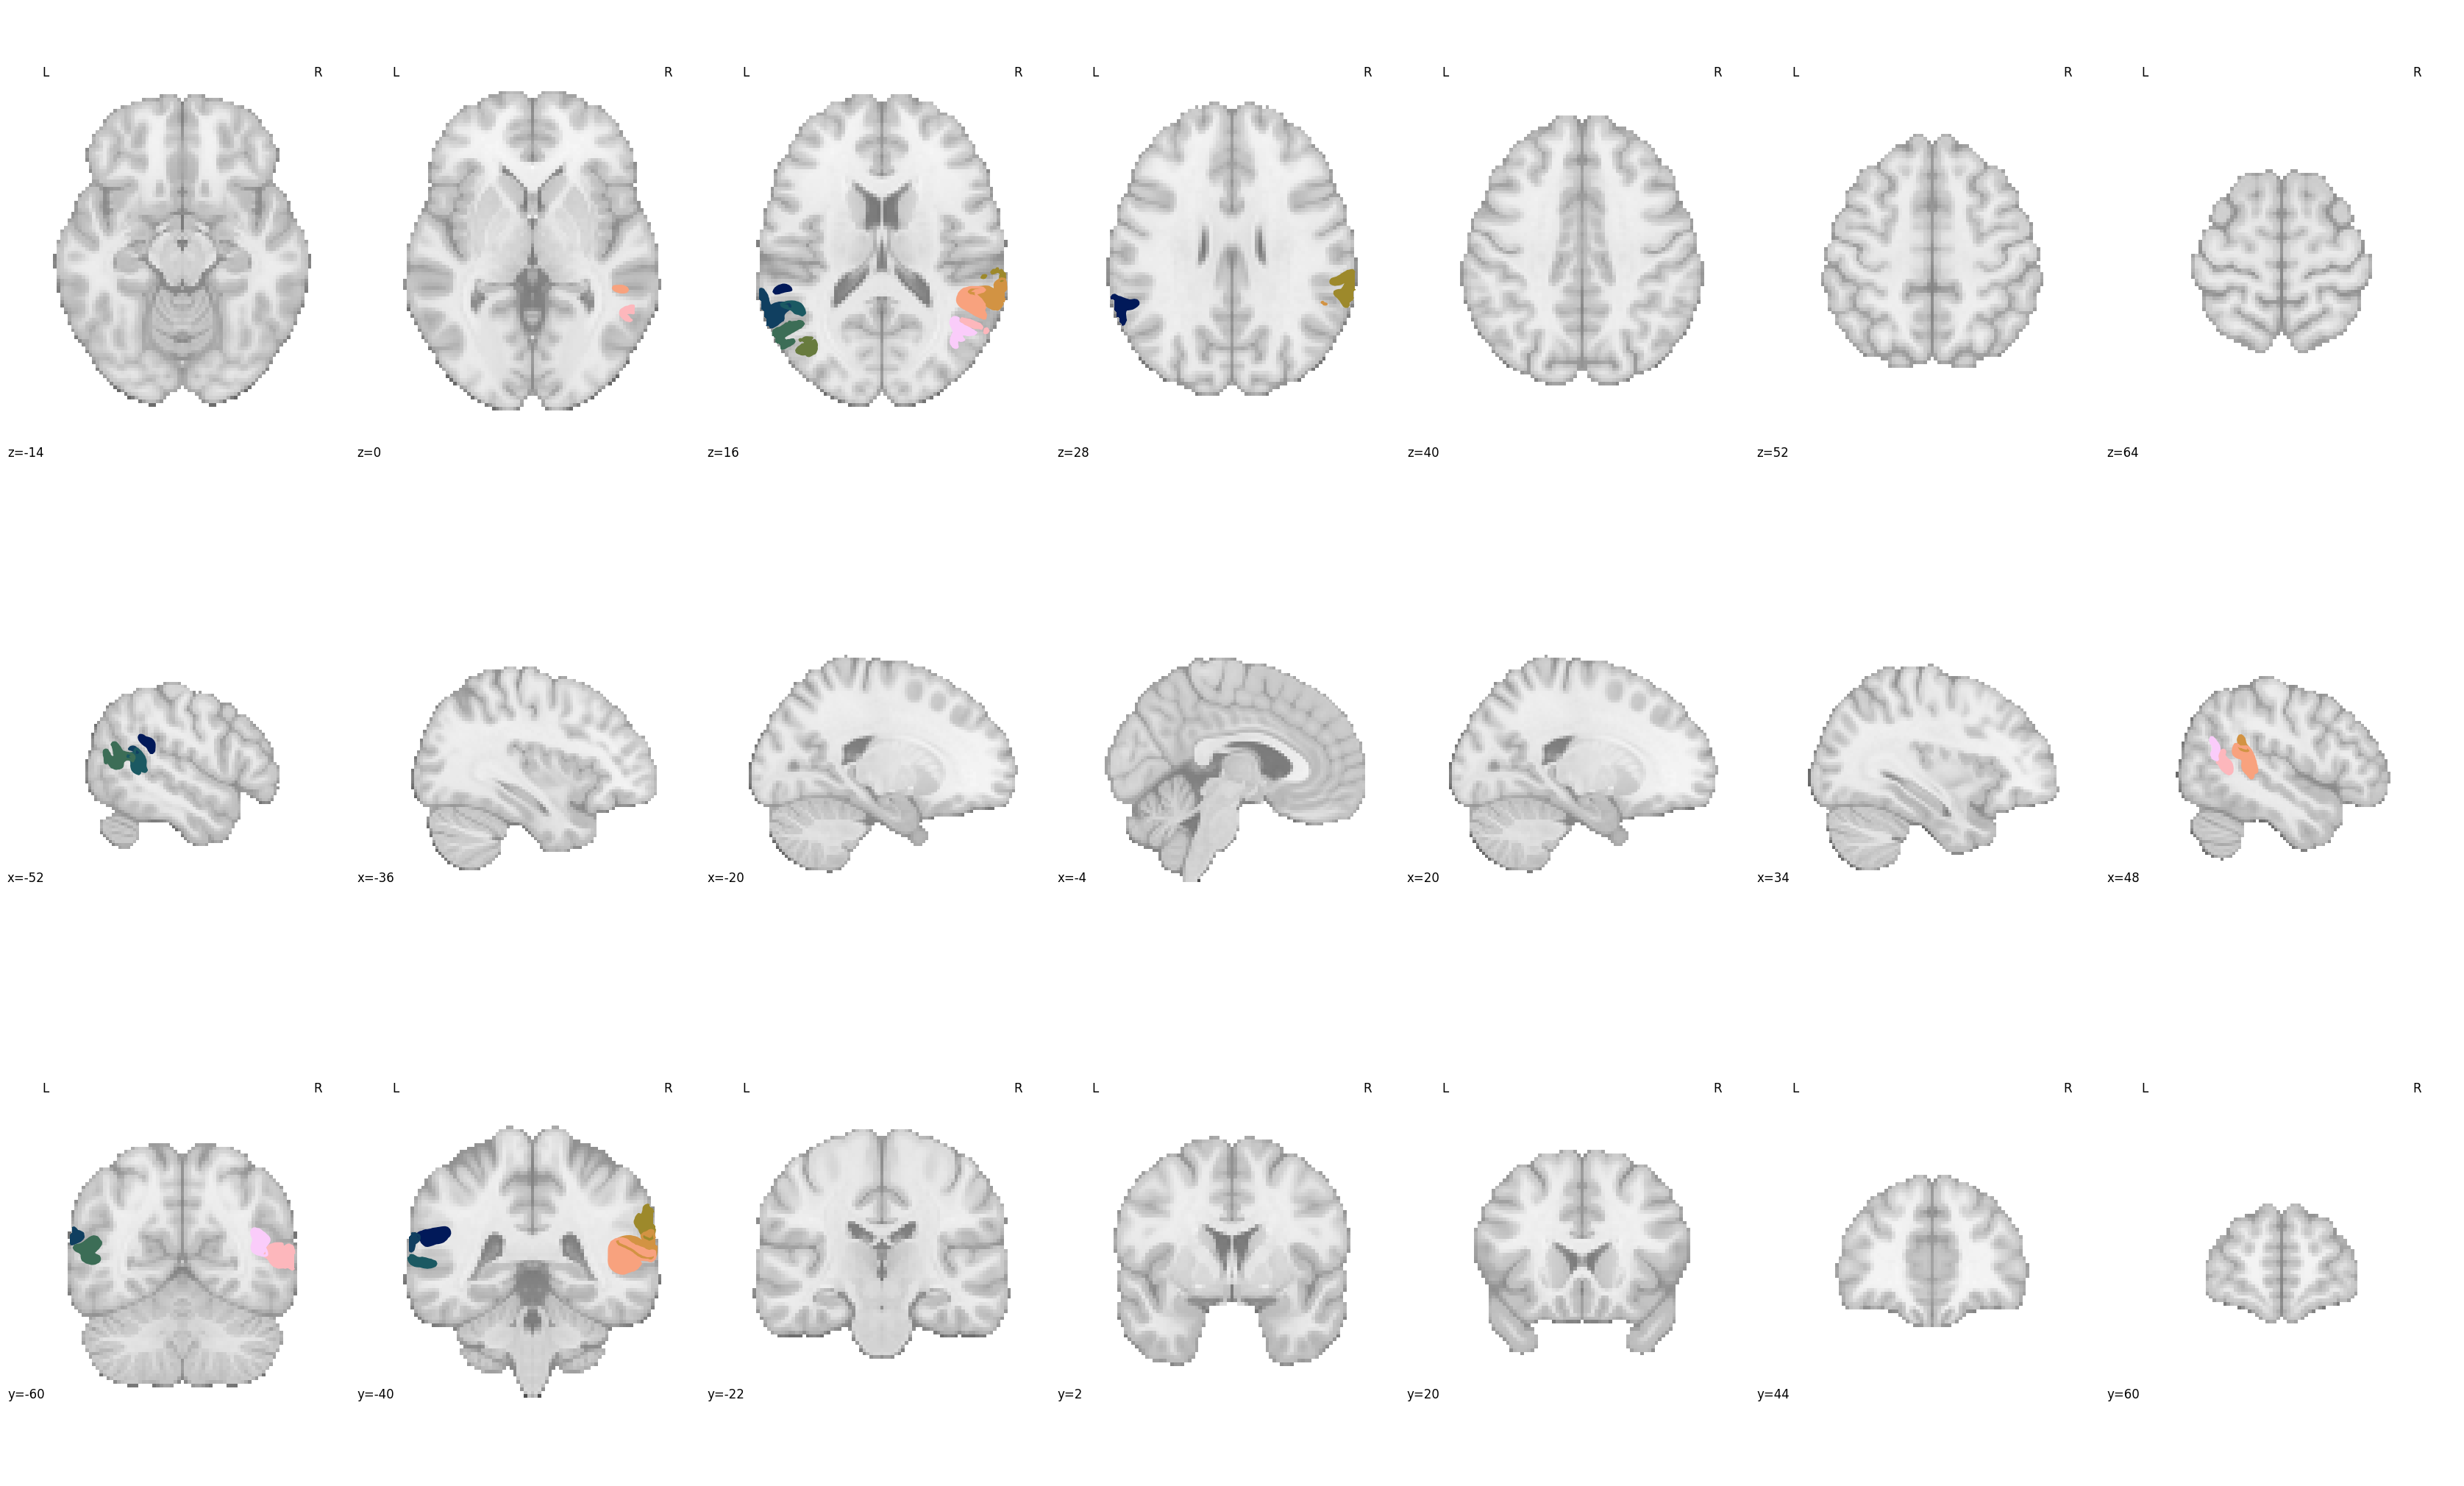

In [25]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


In [33]:
# labels_df['labels_4'].unique().tolist()

unique_values_ignoring_lr = labels_df['labels_4'].str.replace('_L', '').str.replace('_R', '').unique().tolist()

len(unique_values_ignoring_lr)

unique_values_ignoring_lr

['visual_early',
 'visual_MT+',
 'visual_dorsal',
 'visual_ventral',
 'somatomotor_primary',
 'somatomotor_premotor',
 'cingulate_posterior',
 'auditory_early',
 'parietal_TPOJ',
 'cingulate_dlPFC',
 'parietal_superior_lobule',
 'somatomotor_paracentral_lobule',
 'cingulate_ACC_mPFC',
 'cingulate_ventral_frontal',
 'cingulate_vlPFC',
 'somatomotor_operculum',
 'insula_posterior',
 'auditory_association_cortex',
 'insula_operculum',
 'insula_anterior',
 'parietal_inferior_lobule',
 'temporal_medial',
 'temporal_lateral',
 'Hippocampal_Formation',
 'Amygdala',
 'cerebellar_cortex',
 'vermis',
 'VStriatum',
 'CAU',
 'PUT',
 'GP',
 'Thalamus',
 'Midbrain',
 'Pons',
 'Medulla']

In [ ]:
tpj_indices = find_indices_with_term(labels_df, 'TPOJ', columns_to_check)
tpj_atlas = image.index_img(atlas_img, tpj_indices)
plotting.plot_prob_atlas(tpj_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


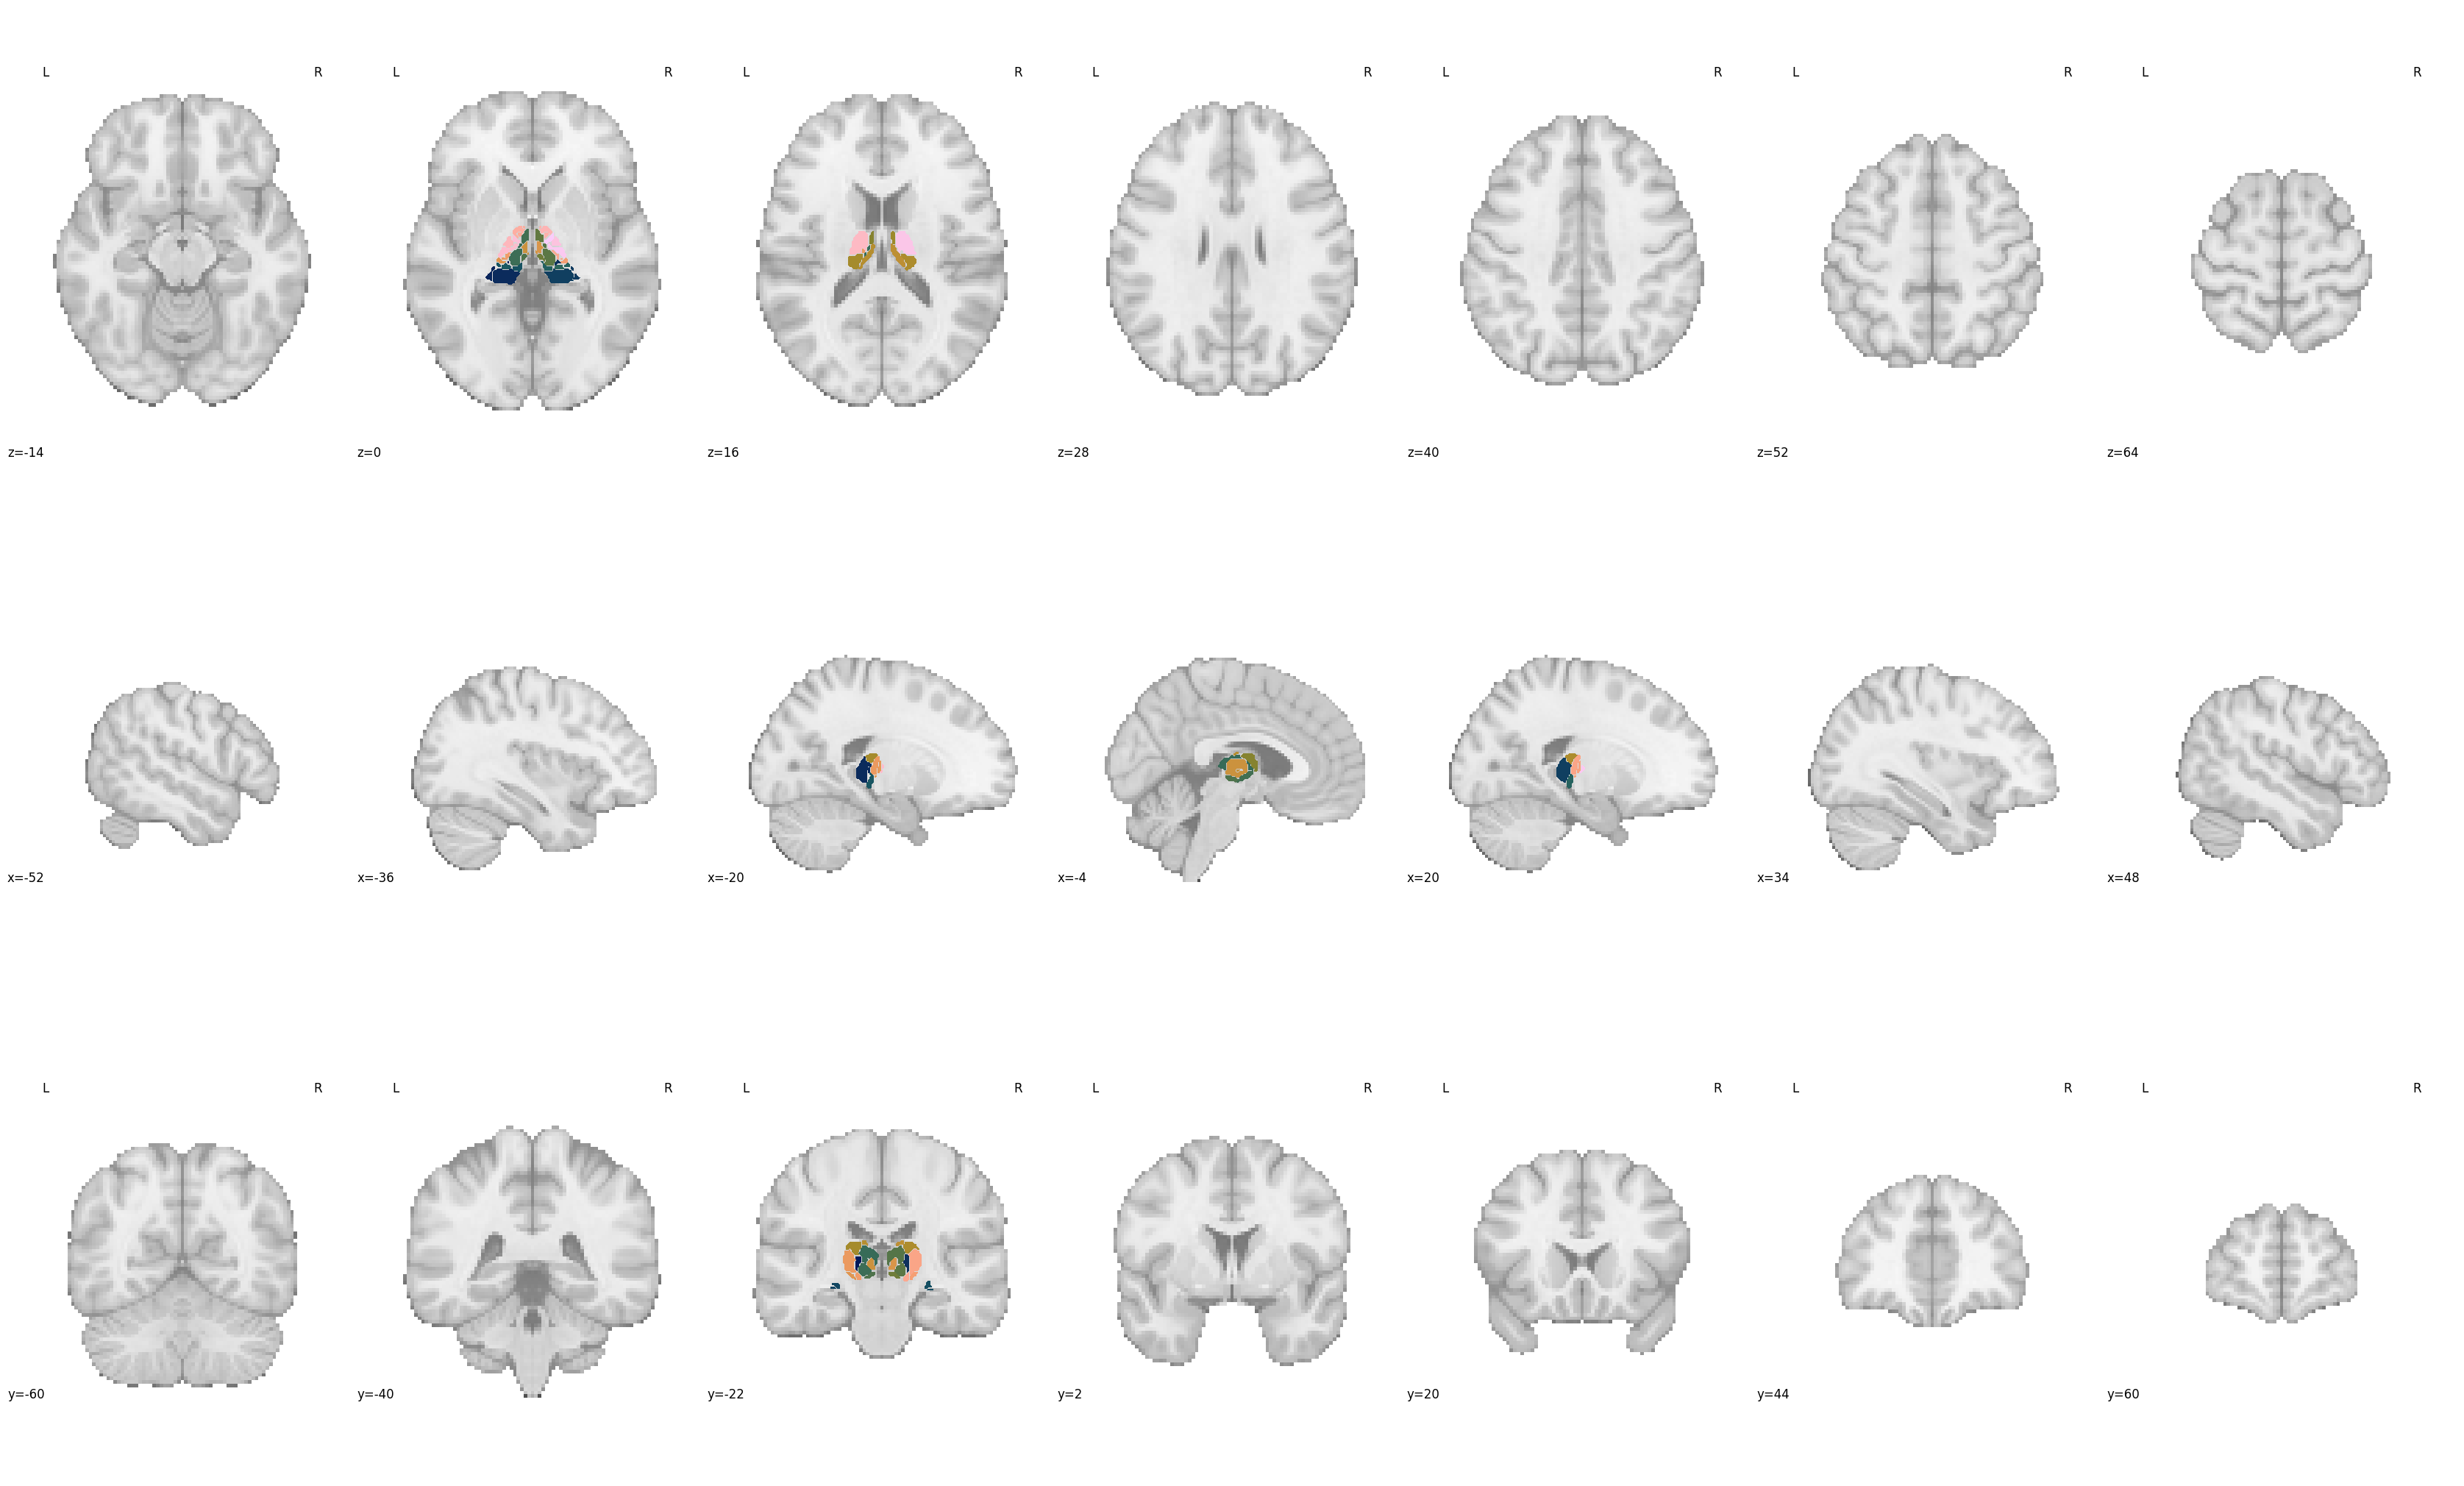

In [34]:
roi_key = 'Thalamus'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


Amygdala has 20 number of rois


/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/numpy/ma/core.py:2820: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/plotting/displays/_axes.py:74: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(


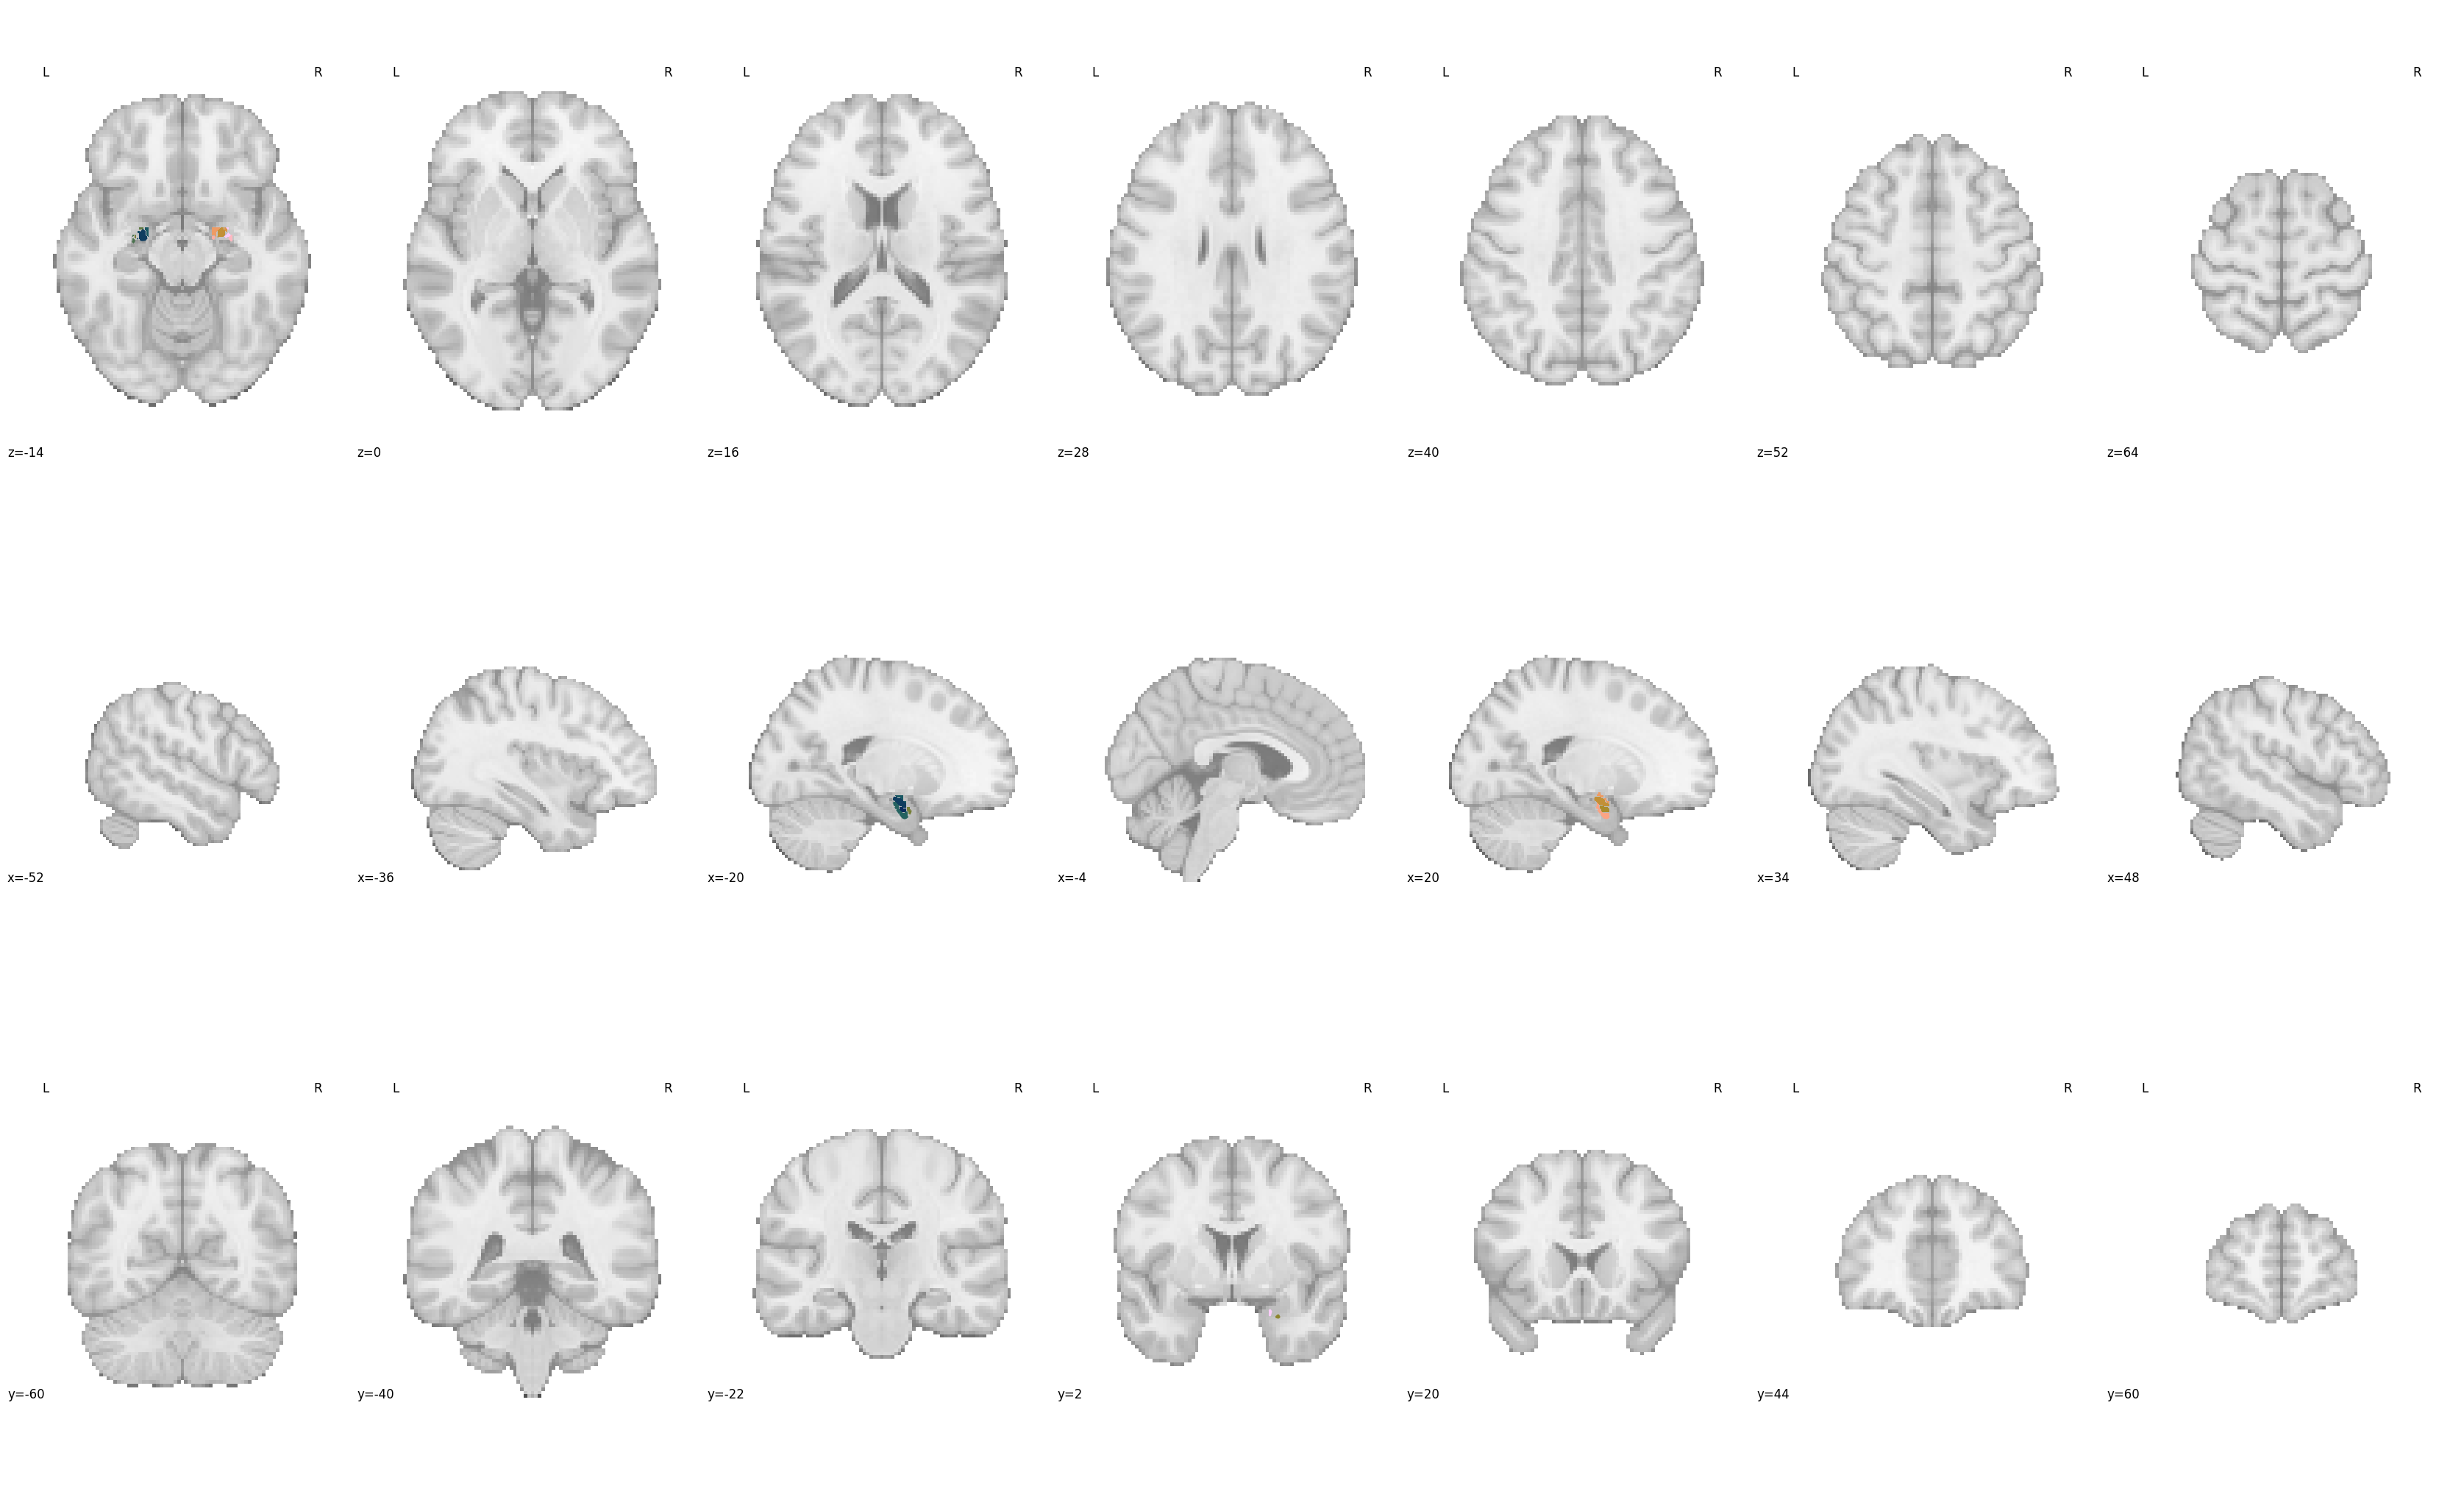

In [35]:
roi_key = 'Amygdala'
thal_indices = find_indices_with_term(labels_df, roi_key, columns_to_check)
print(f"{roi_key} has {len(thal_indices)} number of rois")
thal_atlas = image.index_img(atlas_img, thal_indices)
plotting.plot_prob_atlas(thal_atlas, view_type="filled_contours", threshold=0.25, display_mode="mosaic", draw_cross=False, cmap=cm.batlow, alpha=1)


# load matlab saved version

In [8]:
fname = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm.nii'
atlas_img = load_img(fname)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)

labels_csv = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm.csv'
labels_df = pd.read_csv(labels_csv)

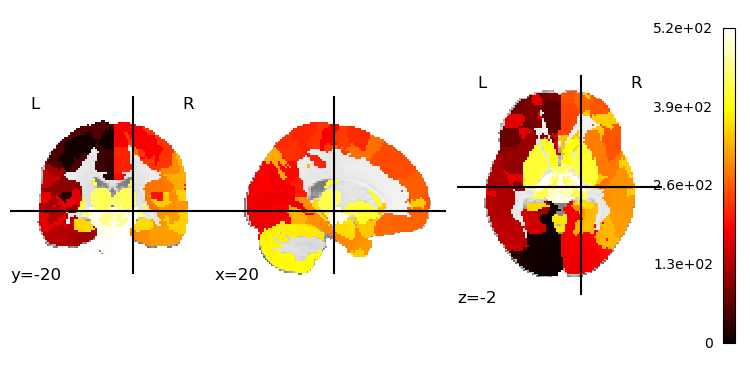

In [9]:
plotting.plot_stat_map(atlas_img)

In [19]:
from neuromaps import parcellate

parc = parcellate.Parcellater(parcellation=fname, 
                       space='MNI152', 
                       resampling_target='parcellation')
# extract data using the MNI atlas and neuromaps parcellator
singletrial_parc = parc.fit_transform('/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', 'MNI152')
singletrial_parc.shape

(1, 524)

## apply atlas to timeseries

In [25]:
from neuromaps import parcellate


masker = NiftiLabelsMasker(labels_img=image.load_img(fname),
                           standardize=True,
                           high_pass=1/128,
                           t_r=0.46, 
                           resampling_target="labels")
# masker.fit_transform(fmri_fname, confounds=subset_confounds.fillna(subset_confounds.median()))
singletrial_parc = masker.fit_transform('/Users/h/Documents/projects_local/sandbox/fmriprep_bold/sub-0081/ses-04/func/sub-0081_ses-04_task-social_acq-mb8_run-3_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')
singletrial_parc.shape

    # masker = NiftiLabelsMasker(labels_img=join(save_top_dir, 'schaefer_2018', 'Schaefer2018_400Parcels_7Networks_order_FSLMNI152_2mm.nii.gz'),
    #                            standardize=True,
    #                            high_pass=1/128,
    #                            t_r=0.46)

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/joblib/memory.py:352: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)


(872, 524)

check parcellated image: (1, 595)


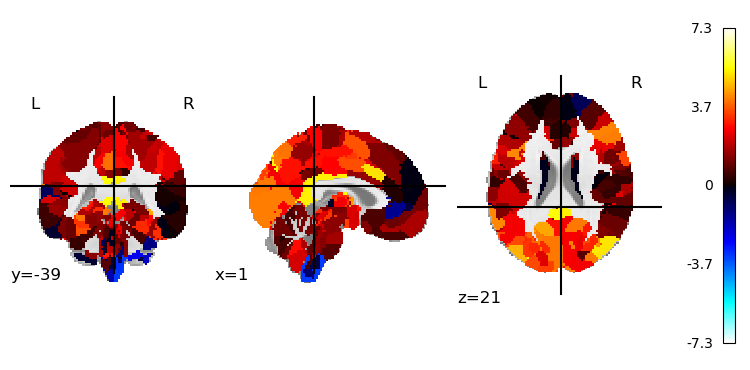

In [77]:
print(f"check parcellated image: {singletrial_parc.shape}")
beta_inv = parc.inverse_transform(singletrial_parc)
plotting.plot_stat_map(beta_inv)

# DEP: convert MNI map to fslr

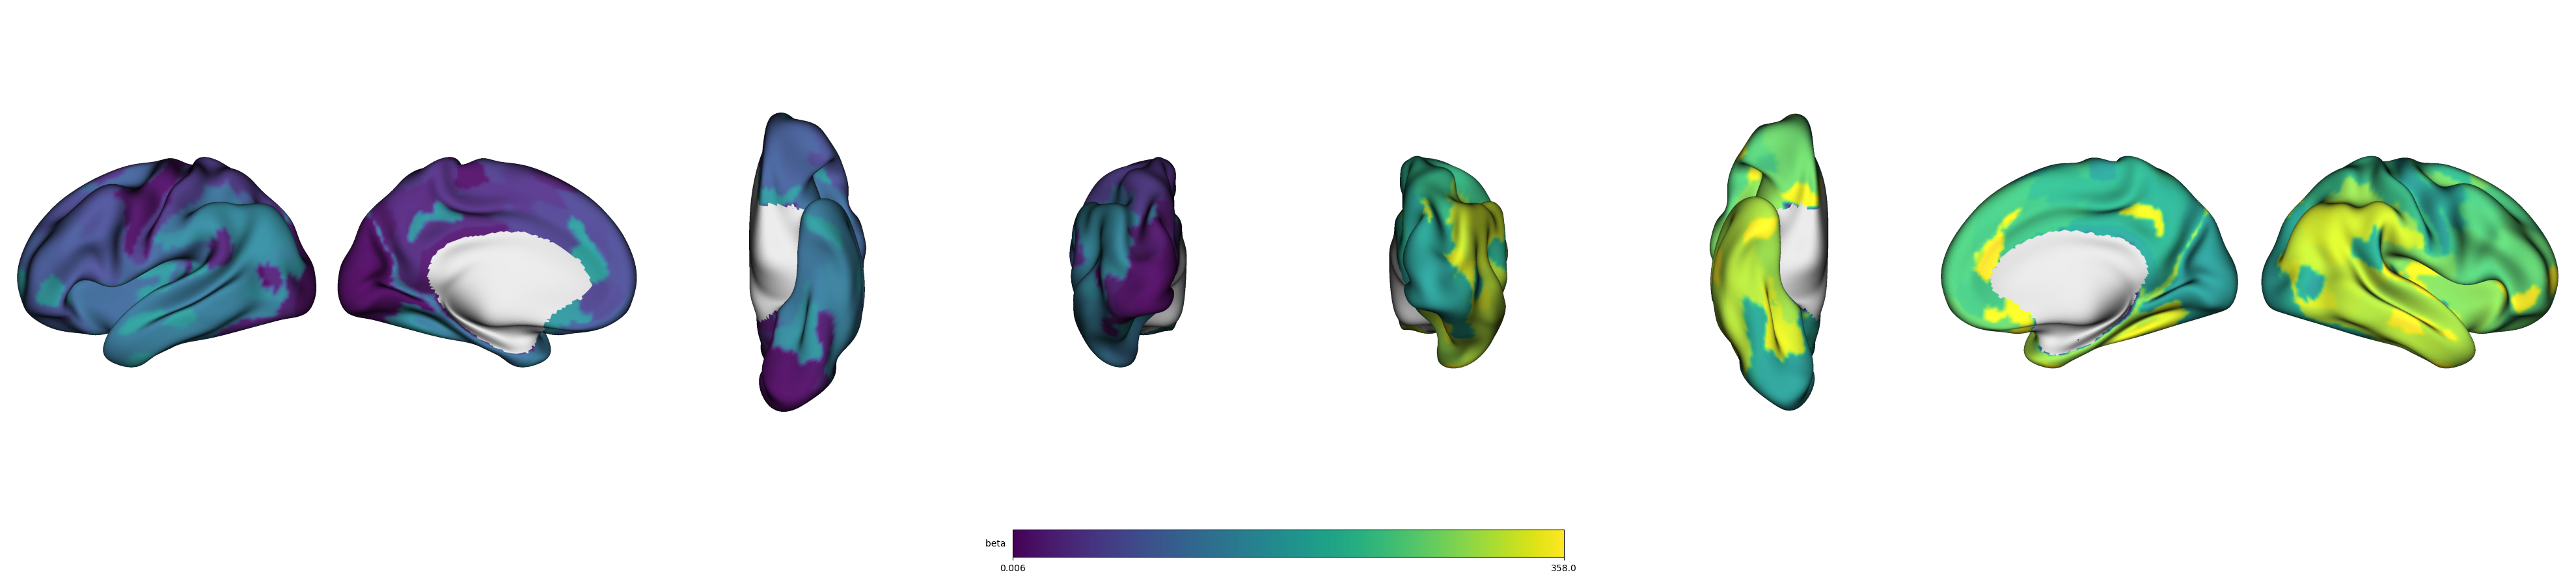

In [48]:
# convert to fslr
# import cmcrameri.cm as ccm
# beta_fslr = 
beta_inv = parc.inverse_transform(singletrial_parc)
beta_fslr = mni152_to_fslr(
        beta_inv, fslr_density='32k', method='linear')

# singletrial_parcfsLR = parcfsLR.fit_transform(beta_fslr, 'fsLR')
# print(f"check parcellated image: {singletrial_parcfsLR.shape}")
# betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)
fig = plot_brain_surfaces(image=beta_fslr, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [84]:
beta_inv.shape

(97, 115, 97, 1)

## load fslr canlab 2023

In [64]:
166+358

524

In [62]:
np.unique(atlas_img.get_fdata())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

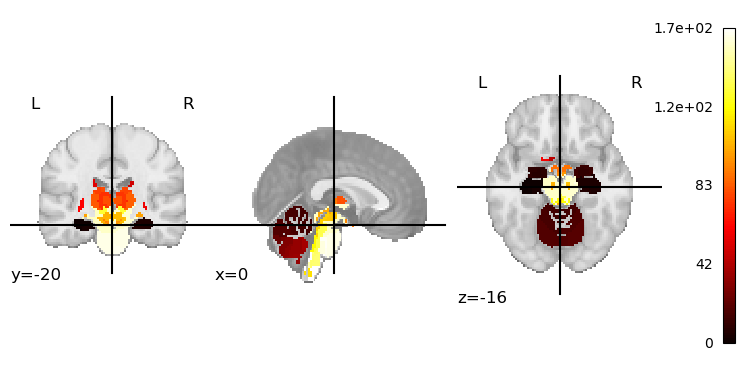

In [59]:
atlas_fname = '/Users/h/Documents/MATLAB/Neuroimaging_Pattern_Masks/Atlases_and_parcellations/2023_CANLab_atlas/src/CANLab2023_MNI152NLin6Asym_coarse_2mm_cifti_vols.nii.gz'

atlas_img = load_img(atlas_fname)
# Load the standard MNI template at 2mm resolution provided by nilearn
target_img = datasets.load_mni152_template(resolution=2)
plotting.plot_stat_map(atlas_img)


In [ ]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
# Define the colors at specific points
colors = [
    (-1.8, "#120041"),  # Start with blue at -1.9
    (-1.2, "#2500fa"),
    (-0.6, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (0.4, "#d50044"),
    (0.8, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (1.2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-1.8, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.9, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (0.6, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (1.2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-1.9, 1.2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()



In [147]:
nib.load('./HCP_MMP1.lh.gii')

In [146]:
def read_gifti(gifti_fn):
    gii = nib.load(gifti_fn)
    data = np.vstack([da.data[np.newaxis, :]
                      for da in gii.darrays])
    return data

read_gifti('./HCP_MMP1.lh.gii')

gii_image = nib.gifti.GiftiImage(darrays=[label_array])
nib.save(gii_image, gifti_output_path)

array([[ 54.,  49.,  41., ..., 122., 122., 122.]], dtype=float32)

In [152]:
rh_names

[b'???',
 b'R_V1_ROI',
 b'R_MST_ROI',
 b'R_V6_ROI',
 b'R_V2_ROI',
 b'R_V3_ROI',
 b'R_V4_ROI',
 b'R_V8_ROI',
 b'R_4_ROI',
 b'R_3b_ROI',
 b'R_FEF_ROI',
 b'R_PEF_ROI',
 b'R_55b_ROI',
 b'R_V3A_ROI',
 b'R_RSC_ROI',
 b'R_POS2_ROI',
 b'R_V7_ROI',
 b'R_IPS1_ROI',
 b'R_FFC_ROI',
 b'R_V3B_ROI',
 b'R_LO1_ROI',
 b'R_LO2_ROI',
 b'R_PIT_ROI',
 b'R_MT_ROI',
 b'R_A1_ROI',
 b'R_PSL_ROI',
 b'R_SFL_ROI',
 b'R_PCV_ROI',
 b'R_STV_ROI',
 b'R_7Pm_ROI',
 b'R_7m_ROI',
 b'R_POS1_ROI',
 b'R_23d_ROI',
 b'R_v23ab_ROI',
 b'R_d23ab_ROI',
 b'R_31pv_ROI',
 b'R_5m_ROI',
 b'R_5mv_ROI',
 b'R_23c_ROI',
 b'R_5L_ROI',
 b'R_24dd_ROI',
 b'R_24dv_ROI',
 b'R_7AL_ROI',
 b'R_SCEF_ROI',
 b'R_6ma_ROI',
 b'R_7Am_ROI',
 b'R_7PL_ROI',
 b'R_7PC_ROI',
 b'R_LIPv_ROI',
 b'R_VIP_ROI',
 b'R_MIP_ROI',
 b'R_1_ROI',
 b'R_2_ROI',
 b'R_3a_ROI',
 b'R_6d_ROI',
 b'R_6mp_ROI',
 b'R_6v_ROI',
 b'R_p24pr_ROI',
 b'R_33pr_ROI',
 b'R_a24pr_ROI',
 b'R_p32pr_ROI',
 b'R_a24_ROI',
 b'R_d32_ROI',
 b'R_8BM_ROI',
 b'R_p32_ROI',
 b'R_10r_ROI',
 b'R_47m_ROI',
 b'R

In [159]:
lh_names = lh_names[1:-1]
rh_names = rh_names[1:-1]


In [161]:
lh_names

[b'L_V1_ROI',
 b'L_MST_ROI',
 b'L_V6_ROI',
 b'L_V2_ROI',
 b'L_V3_ROI',
 b'L_V4_ROI',
 b'L_V8_ROI',
 b'L_4_ROI',
 b'L_3b_ROI',
 b'L_FEF_ROI',
 b'L_PEF_ROI',
 b'L_55b_ROI',
 b'L_V3A_ROI',
 b'L_RSC_ROI',
 b'L_POS2_ROI',
 b'L_V7_ROI',
 b'L_IPS1_ROI',
 b'L_FFC_ROI',
 b'L_V3B_ROI',
 b'L_LO1_ROI',
 b'L_LO2_ROI',
 b'L_PIT_ROI',
 b'L_MT_ROI',
 b'L_A1_ROI',
 b'L_PSL_ROI',
 b'L_SFL_ROI',
 b'L_PCV_ROI',
 b'L_STV_ROI',
 b'L_7Pm_ROI',
 b'L_7m_ROI',
 b'L_POS1_ROI',
 b'L_23d_ROI',
 b'L_v23ab_ROI',
 b'L_d23ab_ROI',
 b'L_31pv_ROI',
 b'L_5m_ROI',
 b'L_5mv_ROI',
 b'L_23c_ROI',
 b'L_5L_ROI',
 b'L_24dd_ROI',
 b'L_24dv_ROI',
 b'L_7AL_ROI',
 b'L_SCEF_ROI',
 b'L_6ma_ROI',
 b'L_7Am_ROI',
 b'L_7PL_ROI',
 b'L_7PC_ROI',
 b'L_LIPv_ROI',
 b'L_VIP_ROI',
 b'L_MIP_ROI',
 b'L_1_ROI',
 b'L_2_ROI',
 b'L_3a_ROI',
 b'L_6d_ROI',
 b'L_6mp_ROI',
 b'L_6v_ROI',
 b'L_p24pr_ROI',
 b'L_33pr_ROI',
 b'L_a24pr_ROI',
 b'L_p32pr_ROI',
 b'L_a24_ROI',
 b'L_d32_ROI',
 b'L_8BM_ROI',
 b'L_p32_ROI',
 b'L_10r_ROI',
 b'L_47m_ROI',
 b'L_8Av_ROI'

In [164]:
lh_names

[b'L_V1_ROI',
 b'L_MST_ROI',
 b'L_V6_ROI',
 b'L_V2_ROI',
 b'L_V3_ROI',
 b'L_V4_ROI',
 b'L_V8_ROI',
 b'L_4_ROI',
 b'L_3b_ROI',
 b'L_FEF_ROI',
 b'L_PEF_ROI',
 b'L_55b_ROI',
 b'L_V3A_ROI',
 b'L_RSC_ROI',
 b'L_POS2_ROI',
 b'L_V7_ROI',
 b'L_IPS1_ROI',
 b'L_FFC_ROI',
 b'L_V3B_ROI',
 b'L_LO1_ROI',
 b'L_LO2_ROI',
 b'L_PIT_ROI',
 b'L_MT_ROI',
 b'L_A1_ROI',
 b'L_PSL_ROI',
 b'L_SFL_ROI',
 b'L_PCV_ROI',
 b'L_STV_ROI',
 b'L_7Pm_ROI',
 b'L_7m_ROI',
 b'L_POS1_ROI',
 b'L_23d_ROI',
 b'L_v23ab_ROI',
 b'L_d23ab_ROI',
 b'L_31pv_ROI',
 b'L_5m_ROI',
 b'L_5mv_ROI',
 b'L_23c_ROI',
 b'L_5L_ROI',
 b'L_24dd_ROI',
 b'L_24dv_ROI',
 b'L_7AL_ROI',
 b'L_SCEF_ROI',
 b'L_6ma_ROI',
 b'L_7Am_ROI',
 b'L_7PL_ROI',
 b'L_7PC_ROI',
 b'L_LIPv_ROI',
 b'L_VIP_ROI',
 b'L_MIP_ROI',
 b'L_1_ROI',
 b'L_2_ROI',
 b'L_3a_ROI',
 b'L_6d_ROI',
 b'L_6mp_ROI',
 b'L_6v_ROI',
 b'L_p24pr_ROI',
 b'L_33pr_ROI',
 b'L_a24pr_ROI',
 b'L_p32pr_ROI',
 b'L_a24_ROI',
 b'L_d32_ROI',
 b'L_8BM_ROI',
 b'L_p32_ROI',
 b'L_10r_ROI',
 b'L_47m_ROI',
 b'L_8Av_ROI'

In [162]:
rh_name_df = pd.DataFrame(rh_names)
rh_name_df.to_csv('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP_MMP1.ROI.txt')
lh_name_df = pd.DataFrame(lh_names)
lh_name_df.to_csv('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP_MMP1.ROI.txt')

/var/folders/sq/9y9jm3711js9zfqyb64n8c840000gn/T/ipykernel_93794/1887640510.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


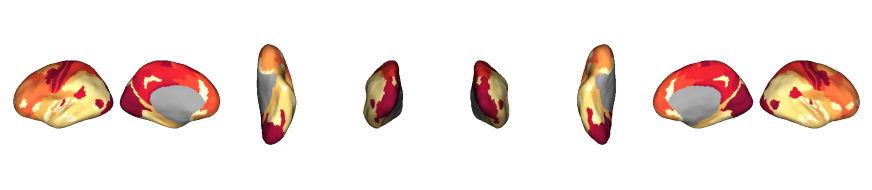

In [158]:
from neuromaps.datasets import fetch_fslr
import numpy as np
from neuromaps.datasets import fetch_fsaverage, fetch_fslr
from neuromaps.transforms import fsaverage_to_fslr
import nibabel as nib
surfaces = fetch_fsaverage()
lh, rh = surfaces['inflated']

# fsaverage = datasets.fetch_surf_fsaverage(mesh = 'fsaverage6')
lh_labels, lh_ctab, lh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/lh.HCP_MMP1.fsaverage6.annot')
rh_labels, rh_ctab, rh_names= nib.freesurfer.io.read_annot('/Users/h/Documents/projects_local/cue_expectancy/data/atlas/rh.HCP_MMP1.fsaverage6.annot')
lh_roi_map = np.full(lh_labels.shape, lh_labels, dtype=np.float32)
rh_roi_map = np.full(rh_labels.shape, rh_labels, dtype=np.float32)
lh_roi_map[lh_roi_map == 0] = np.nan
rh_roi_map[rh_roi_map == 0] = np.nan
def write_gifti(data, output_fn):
    img = nib.gifti.GiftiImage(darrays=[nib.gifti.GiftiDataArray(data.astype('float32'))])
    nib.save(img, output_fn)

write_gifti(lh_roi_map, './HCP_MMP1.lh.gii') 
write_gifti(rh_roi_map, './HCP_MMP1.rh.gii') 

p = Plot(surf_lh=lh, surf_rh=rh, size=(1000, 200), zoom=1.2, layout='row', views=['lateral', 'medial', 'ventral', 'posterior'], mirror_views=True)
# fig = p.build()

# plot_roi(lh_roi_map, rh_roi_map, roi_name, 'Reds')
p.add_layer({'left': lh_roi_map, 'right': rh_roi_map}, cmap='YlOrRd_r', cbar=False)
fig = p.build()
fig.show()


# sandbox

In [32]:
singletrial_parc

array([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
         12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
         23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
         34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
         45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
         56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
         67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
         78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
         89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
        100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
        111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
        122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
        133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
        144., 145., 146., 147., 148., 

In [57]:
atlas_fslr[0].agg_data().shape

(32492,)

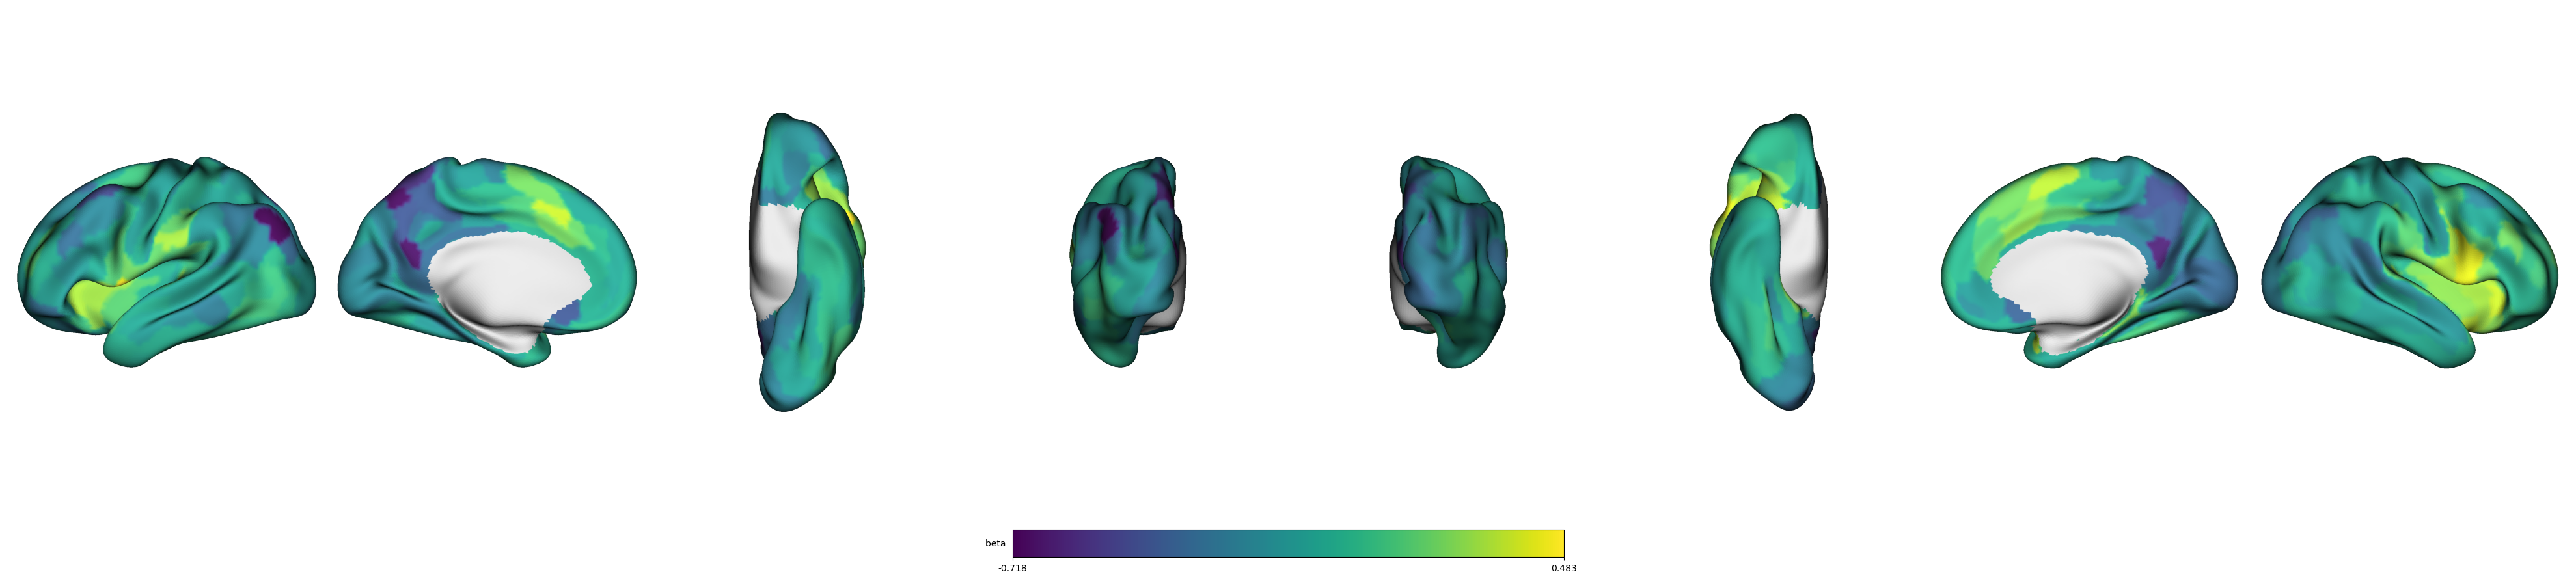

In [54]:
# convert to fslr
# beta_fslr = 
# import cmcrameri.cm as ccm
from neuromaps.transforms import mni152_to_fslr
atlas_ctx = '/Users/h/Desktop/CANLab2023_MNI152NLin2009cAsym_coarse_2mm_cortex.nii.gz'
singletrial_fname = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0014/sub-0014_ses-03_run-01_runtype-pain_event-stimulus_trial-003_cuetype-high_stimintensity-low.nii.gz'
parc = parcellate.Parcellater(parcellation=atlas_ctx, 
                       space='MNI152', 
                       resampling_target='parcellation')
singletrial_parc = parc.fit_transform(singletrial_fname, 'MNI152')

atlas_inv = parc.inverse_transform(singletrial_parc)
atlas_fslr = mni152_to_fslr(
        atlas_inv, fslr_density='32k', method='linear')

# singletrial_parcfsLR = parcfsLR.fit_transform(beta_fslr, 'fsLR')
# print(f"check parcellated image: {singletrial_parcfsLR.shape}")
# betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)
fig = plot_brain_surfaces(image=atlas_fslr, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

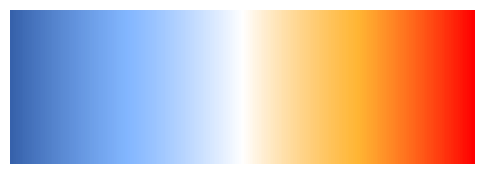

In [68]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
from neuromaps.datasets import fetch_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', color_range=None):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
# Define the colors at specific points
colors = [
    (-1.8, "#120041"),  # Start with blue at -1.9
    (-1.2, "#2500fa"),
    (-0.6, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (0.4, "#d50044"),
    (0.8, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (1.2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-1.8, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-0.9, to_rgba("#63a4ff", alpha=0.8)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (0.6, to_rgba("#ffa300", alpha=0.8)),   # 60% opacity
    (1.2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-1.9, 1.2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=cmap)
ax.set_axis_off()

plt.show()



In [39]:
singletrialfsLR

(<nibabel.gifti.gifti.GiftiImage at 0x294d5fe10>,
 <nibabel.gifti.gifti.GiftiImage at 0x294d5fdd0>)

check parcellated image: (26666,)


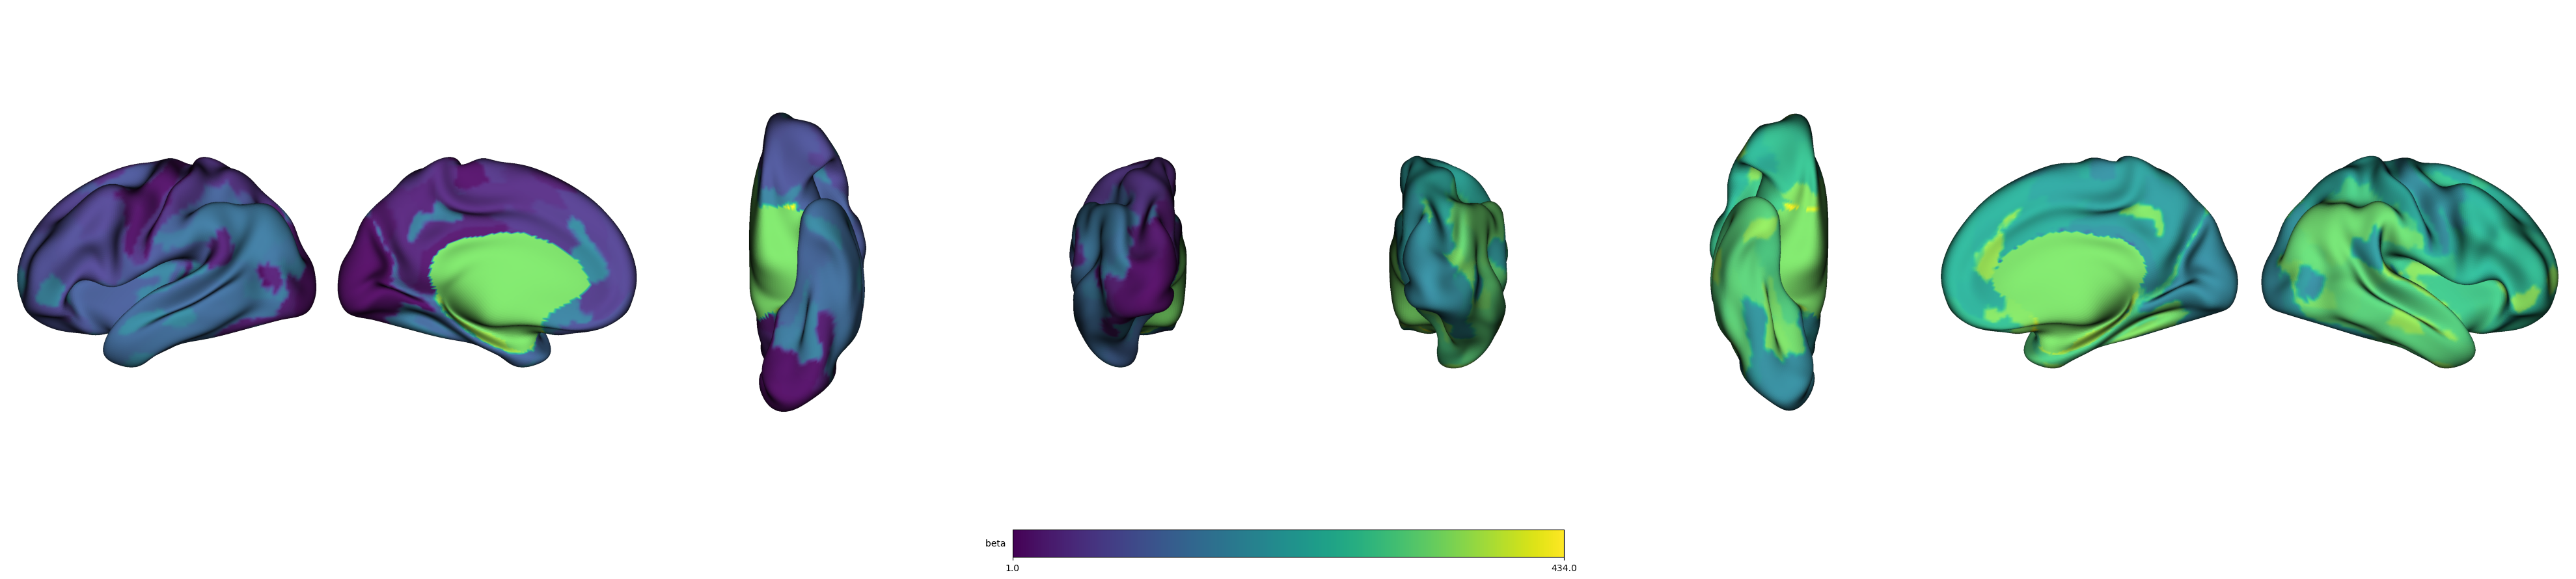

In [74]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='linear')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='linear')
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()

In [53]:
len(np.unique(canlab2023fsLR[0].agg_data()))

191

In [55]:
singletrialfsLR[0].agg_data()

array([ 1.1518242 ,  1.2154433 ,  2.3076987 , ..., -0.6537053 ,
       -0.34157434, -0.07537952], dtype=float32)

In [73]:
from neuromaps import parcellate
from neuromaps.transforms import mni152_to_fslr
from neuromaps.datasets import fetch_annotation, fetch_fslr
canlab2023fsLR = mni152_to_fslr(
        fname, fslr_density='32k', method='nearest')
singletrialfsLR = mni152_to_fslr(
        '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/singletrial_rampupplateau/sub-0018/sub-0018_ses-03_run-01_runtype-cognitive_event-cue_trial-000_cuetype-low.nii.gz', fslr_density='32k', method='nearest')


In [ ]:
parcfsLR = parcellate.Parcellater(parcellation=canlab2023fsLR, 
                       space='fsLR', 
                       resampling_target='parcellation')

singletrial_parcfsLR = parcfsLR.fit_transform(singletrialfsLR, 'fsLR')
print(f"check parcellated image: {singletrial_parcfsLR.shape}")
betafsLR_inv = parcfsLR.inverse_transform(singletrial_parcfsLR)

fig = plot_brain_surfaces(image=canlab2023fsLR, cbar_label=f'beta ', cmap='viridis')#color_range[beta_ind])
plt.show()